$$\textbf{PLN. Tarea 1}$$
$$\textit{Y. Sarahi García Gozález}$$

$\color{lightblue}{Librerías \space }$ <br>

In [42]:
import nltk
import os
import shutil
import pandas as pd
import numpy as np
import datetime
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.text import Text
from nltk.corpus import stopwords 


In [2]:
print("Tarea realizada en MacOs. \nLas versiones de las librerías y de python utilizadas fueron:\n")
from platform import python_version
print("Python version", python_version())
print("Numpy version", np.__version__)
print("NLTK version", nltk.__version__)
print("Pandas version", pd.__version__)



Tarea realizada en MacOs. 
Las versiones de las librerías y de python utilizadas fueron:

Python version 3.11.7
Numpy version 1.26.3
NLTK version 3.8.1
Pandas version 2.1.4


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 1}$

<font size=2.5 color='lightblue'>
1. Cargar todas las conferencias en un string y aplicar la función split

In [3]:
def leer_archivos(ruta_corpus):
  """
  Esta función lee todos los archivos .txt en una carpeta y concatena su contenido.

  Argumentos:
    ruta_corpus: Ruta a la carpeta que contiene los archivos .txt.

  Regresa:
    Una cadena con el contenido concatenado de todos los archivos .txt.
  """

  contador = 0  # Para contar el número de documentos
  conferencias = ""  # Para almacenar el contenido concatenado

  for archivo in os.listdir(ruta_corpus):
    f = os.path.join(ruta_corpus, archivo)

    # Verificamos si es un archivo y termina en .txt
    if os.path.isfile(f) and archivo.endswith('.txt'):
      try:
        # Leemos el contenido del archivo
        with open(f, 'r') as file:
          conferencia_actual = file.read()
          conferencias += conferencia_actual  # Concatenamos las palabras del texto en la variable conferencias
          contador += 1
      except Exception as e:
        print(f"Error leyendo archivo {f}: {e}")  # Error

  print(f"El número de conferencias guardadas en la variable conferencias es: {contador}")

  return conferencias

In [5]:
ruta_corpus="/Users/ely/Documents/Maestria/segundo_semestre/lenguaje/01_practica/clean_data/"
conferencias = leer_archivos(ruta_corpus)

El número de conferencias guardadas en la variable conferencias es: 1720


In [5]:
#La variable conferencias es un string que contiene todas las conferencias
type(conferencias)

str

In [10]:
#Usamos split para generar tokens:
tokens=conferencias.split()

In [13]:
#imprimimos algunas palabras
tokens[30:50]

['Inicio',
 'Sala',
 'de',
 'Prensa',
 'Boletines',
 'Transcripciones',
 'Documentos',
 'Fotogalería',
 'Fotogalerías.',
 'Reuniones',
 'estatales',
 'del',
 'Banco',
 'del',
 'Bienestar',
 'Videos',
 '5°',
 'Informe',
 'de',
 'Gobierno']

<font size=2.5 color='lightblue'>
2. Contar la cantidad de palabras en todas las conferencias

In [14]:
len(tokens)

14808083

<font size=2.5 color='lightblue'>
3. Vocabulario

In [25]:
#convertimos a un dataframe
df=pd.DataFrame(tokens)
#extraemos los elementos unicos de la lista 
vocabulario=df.iloc[:,0].unique().tolist()

In [40]:
vocabulario #imprimimos

['10.11.22',
 'Versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'prensa',
 'matutina',
 'del',
 'presidente',
 'Andrés',
 'Manuel',
 'López',
 'Obrador',
 '–',
 'Presidente',
 'México',
 'Warning:',
 'Invalid',
 'argument',
 'supplied',
 'for',
 'foreach()',
 'in',
 '/var/www/html/wordpress/wp-content/themes/diplomat/header-socials.php',
 'on',
 'line',
 '8',
 'Inicio',
 'Sala',
 'Prensa',
 'Boletines',
 'Transcripciones',
 'Documentos',
 'Fotogalería',
 'Fotogalerías.',
 'Reuniones',
 'estatales',
 'Banco',
 'Bienestar',
 'Videos',
 '5°',
 'Informe',
 'Gobierno',
 'Gabinete',
 'Oficina',
 'Presidencia',
 'Biografía',
 'Contacto',
 'Search',
 'Home',
 'Estenográfica',
 '2022:',
 'Año',
 'Ricardo',
 'Flores',
 'Magón,',
 'precursor',
 'Revolución',
 'Mexicana',
 'PRESIDENTE',
 'ANDRÉS',
 'MANUEL',
 'LÓPEZ',
 'OBRADOR:',
 'Buenos',
 'días.',
 'Ánimo.',
 'Bueno,',
 'vamos',
 'a',
 'dedicar',
 'el',
 'día',
 'hoy',
 'informar',
 'sobre',
 'situación',
 'delitos,',
 'castigos.',
 

In [41]:
len(vocabulario) #número de palabras distintas en las conferencias

236219

<font size=2.5 color='lightblue'>
4. Riqueza del Vocabulario

Notemos que hay 14,808,083 palabras en $\textbf{TODAS}$ las conferencias, pero sólo 236,219 palabras $\textbf{DISTINTAS}$, una manera de medir la riqueza del vocabulario es calculando la razón entre estas dos cantidades:

* Caltidad de tokens en todo el corpus=$14,808,083$

* Longitud del vocabulario en todo el corpus=$236,219$

$$riquiza=\frac{14,808,083}{236,219}=62.6879$$

Lo que nos indica que en promedio cada palabra se utiliza 62 veces

<font size=2.5 color='lightblue'>
5. Puntos anteriores pero con todo el texto en minúsculas

In [47]:
#En la variable conerencias ya se encuentran todas las conferencias, ahora vamos a convertir a minúsculas:
conferencias_minusculas=conferencias.lower()

#Usamos split para generar tokens:
tokens_minusculas=conferencias_minusculas.split()

#imprimimos algunas palabras (mismas que en el punto 1, puede observarse que ahora todas las letras son minúsuclas)
tokens_minusculas[30:50]

['inicio',
 'sala',
 'de',
 'prensa',
 'boletines',
 'transcripciones',
 'documentos',
 'fotogalería',
 'fotogalerías.',
 'reuniones',
 'estatales',
 'del',
 'banco',
 'del',
 'bienestar',
 'videos',
 '5°',
 'informe',
 'de',
 'gobierno']

In [48]:
len(tokens_minusculas) #imprimimos la cantidad de palabras en TODAS las conferencias

14808083

In [51]:
#convertimos a un dataframe
df_minusculas=pd.DataFrame(tokens_minusculas)
#extraemos los elementos unicos de la lista 
vocabulario_minusculas=df_minusculas.iloc[:,0].unique().tolist()
#imprimimos algunas
vocabulario_minusculas #mismas palabras que antes 

['10.11.22',
 'versión',
 'estenográfica',
 'de',
 'la',
 'conferencia',
 'prensa',
 'matutina',
 'del',
 'presidente',
 'andrés',
 'manuel',
 'lópez',
 'obrador',
 '–',
 'méxico',
 'warning:',
 'invalid',
 'argument',
 'supplied',
 'for',
 'foreach()',
 'in',
 '/var/www/html/wordpress/wp-content/themes/diplomat/header-socials.php',
 'on',
 'line',
 '8',
 'inicio',
 'sala',
 'boletines',
 'transcripciones',
 'documentos',
 'fotogalería',
 'fotogalerías.',
 'reuniones',
 'estatales',
 'banco',
 'bienestar',
 'videos',
 '5°',
 'informe',
 'gobierno',
 'gabinete',
 'oficina',
 'presidencia',
 'biografía',
 'contacto',
 'search',
 'home',
 '2022:',
 'año',
 'ricardo',
 'flores',
 'magón,',
 'precursor',
 'revolución',
 'mexicana',
 'obrador:',
 'buenos',
 'días.',
 'ánimo.',
 'bueno,',
 'vamos',
 'a',
 'dedicar',
 'el',
 'día',
 'hoy',
 'informar',
 'sobre',
 'situación',
 'delitos,',
 'castigos.',
 'es',
 'sección',
 'cero',
 'impunidad.',
 'muy',
 'importante,',
 'ya',
 'lo',
 'hemos',
 

In [52]:
len(vocabulario_minusculas) #número de palabras distintas en las conferencias

216627

Notemos que hay 14,808,083 palabras en $\textbf{TODAS}$ las conferencias en minúsculas, igual que antes, tiene sentido que este número no cambie pues se están contabilizando todas las cadenas separadas por un espacio en ambos casos. Y ahora sólo hay 216,627 palabras $\textbf{DISTINTAS}$ (antes había 236,219), de manera que la riqueza del vocabulario es calculando la razón entre estas dos cantidades:

* Caltidad de tokens en todo el corpus con minúsculas=$14,808,083$

* Longitud del vocabulario en todo el corpus en minúsculas=$216,627$

$$riqueza=\frac{14,808,083}{216,627}=68.35751$$

Lo que nos indica que en promedio cada palabra se utiliza 68 veces.

Cuando tomamos todas las palabras en minúsuclas el número promedio de veces que se utiliza cada palabra aumenta pues al extraer el vocabulario tomando las palabras escritas con mayúsculas y minúsculas, se consideran que, por ejemplo, 
Presidente y presidente, son palabras distintas por lo que el vocabulario parece ser más extenso pero no es así.

<font size=2.5 color='lightblue'>
6. Puntos anteriores pero usando el tokenizador RegExp

In [58]:
# Definir la expresión regular para tokens que contienen solo letras mayúsculas y minúsculas
#expresion obtenida de ChatGPT
exp_reg = r'\b[A-Za-z]+\b'  # \b indica límites de palabra, [A-Za-z]+ coincide con una o más letras 

#tokenizador RegExp
tokenizer_reg_exp = RegexpTokenizer(exp_reg)
tokens_reg_exp = tokenizer_reg_exp.tokenize(conferencias)


In [60]:
type(tokens_reg_exp) #nos regresa una lista

list

In [63]:
tokens_reg_exp[30:50]#mostramos algunos tokens, esta vez son distintas a los tokens obtenidos "a mano"

['on',
 'line',
 'Inicio',
 'Sala',
 'de',
 'Prensa',
 'Boletines',
 'Transcripciones',
 'Documentos',
 'Reuniones',
 'estatales',
 'del',
 'Banco',
 'del',
 'Bienestar',
 'Videos',
 'Informe',
 'de',
 'Gobierno',
 'Gabinete']

In [62]:
len(tokens_reg_exp) #Hay 12,896,573 tokens, menos que antes (14,808,083) 

12896573

In [66]:
#obtenemos el vocabulario
set(tokens_reg_exp)

{'convocaremos',
 'editorializa',
 'Huamelula',
 'vajillas',
 'ejecutara',
 'reorganizarse',
 'habilitarlas',
 'Papaloapan',
 'arrastrarse',
 'Chlopak',
 'Man',
 'trucas',
 'Enfatizamos',
 'valerse',
 'repatriados',
 'vuelo',
 'ministraciones',
 'vonstitudinario',
 'Oteyza',
 'condenarla',
 'entristece',
 'Bienestar',
 'Luchamos',
 'Cardones',
 'manecilla',
 'Greyson',
 'interrogo',
 'Politico',
 'observarlas',
 'Unidroit',
 'Mucho',
 'conciso',
 'Rilke',
 'pesimamente',
 'recuperarles',
 'arraigados',
 'INBA',
 'reconfigurarlas',
 'entregas',
 'Romita',
 'cegados',
 'OFRECER',
 'Ozumba',
 'significativos',
 'consumidos',
 'camposanto',
 'musicales',
 'Millares',
 'legislatura',
 'regimos',
 'regadera',
 'energizar',
 'velocidad',
 'contenga',
 'captura',
 'aprobatoria',
 'gozaron',
 'pleitazo',
 'reemergentes',
 'victoriosos',
 'Horrendo',
 'regresando',
 'Mercantiles',
 'revocando',
 'originan',
 'Estemos',
 'quejosos',
 'comprobables',
 'Eres',
 'robarse',
 'indudablemente',
 'socia

In [67]:
len(set(tokens_reg_exp)) #Hay 77,956 palabras DISTINTAS

77956

Caltidad de tokens en todo el corpus con RegRxp=$12,896,573$

Longitud del vocabulario en todo el corpus=$77,956$

$$riqueza=\frac{12,896,573}{77956}=165.434$$

Lo que nos indica que en promedio cada palabra se utiliza 165 veces.


In [70]:
#Cargamos en un objeto Text de NLTK
texto_nltk_reg_exp = Text(tokens_reg_exp)

print(texto_nltk_reg_exp)

<Text: de la conferencia de prensa matutina del presidente...>


<font size=2.5 color='lightblue'>
7. Puntos anteriores pero usando TweetTokenizer

In [10]:
# Crear el tokenizador TweetTokenizer
tokenizer_tweet = TweetTokenizer()

In [76]:
# Tokenizar la cadena "conferencias_minusculas" utilizando el tokenizador TweetTokenizer
# conferencias_minusculas contiene todas las conferencias en minúsulas
tokens_tweet = tokenizer_tweet.tokenize(conferencias_minusculas)

In [77]:
type(tokens_tweet) #nos regresa una lista

list

In [78]:
tokens_tweet[30:50]#mostramos algunos tokens, notemos que son distintos a los obtenidos "a mano" y a los obtenidos con RegExp

['in',
 '/',
 'var',
 '/',
 'www',
 '/',
 'html',
 '/',
 'wordpress',
 '/',
 'wp-content',
 '/',
 'themes',
 '/',
 'diplomat',
 '/',
 'header-socials.php',
 'on',
 'line',
 '8']

In [79]:
len(tokens_tweet) #Hay 17,214,205 tokens, más que los hechos "a mano" (14,808,083) y más que con RegExp (12,896,573 )

17214205

In [80]:
#obtenemos el vocabulario
set(tokens_tweet)

{'vajillas',
 'ciento.no',
 'reorganizarse',
 'habilitarlas',
 'vivek',
 'trucas',
 'valerse',
 'vuelo',
 'juchitá',
 'tlapacoyan',
 'cenacom',
 'manecilla',
 'interrogo',
 'balconéo',
 'aluvión',
 'observarlas',
 'ribereños',
 'artigas',
 'conciso',
 'aba',
 'prioridad.entonces',
 'candelaria',
 'cegados',
 'entregas',
 'aec',
 'ajuste.las',
 'consumidos',
 'camposanto',
 'valtierra',
 'universalización',
 '97.39',
 'energizar',
 'velocidad',
 'reemergentes',
 'victoriosos',
 'yanerit',
 '87.2',
 'originan',
 'significación',
 'quejosos',
 'comprobables',
 'robarse',
 'indudablemente',
 'conocedora',
 '6:31',
 'duranguillo',
 'narcotraficante',
 'travieso',
 'letras',
 'prestarnos',
 'sodios',
 'enfocado',
 'empezarán',
 'gia-cobasa',
 'maizoro',
 'multiplicado',
 'uayma',
 'edy',
 'contratiempo',
 'empatamos',
 'publicarían',
 'transformarán',
 'reclamo',
 'calculábamos',
 'cambiarle',
 'empolvado',
 '20.48',
 '537',
 'mely',
 'penchyna',
 'culposos',
 'percibían',
 'barrales',
 'fac

In [81]:
len(set(tokens_tweet))  #Hay 91,738 palabras DISTINTAS

91738

Caltidad de tokens en todo el corpus con TweetTokenizer=$17,214,205$

Longitud del vocabulario en todo el corpus=$91,738$

$$riqueza=\frac{17,214,205}{91,738}=187.64530$$

Lo que nos indica que en promedio cada palabra se utiliza 187 veces.

<font size=3 color='lightblue'>

* Diferencias

|Tokenizador| Tokens    |Vocabulario| Riqueza   |
|-----------|-----------|-----------|-----------|
| "a mano" | 14,808,083 | 236,219 | 62 |
|  "a mano" minusculas| 14,808,083 | 216,627 | 68 |
|  RegExp| 12,896,573 | 77,956 | 165 |
| Tweet | 17,214,205 | 91,738 | 187 |


Recordemos que:
* La función split()se utiliza para dividir una cadena en una lista de subcadenas, utilizando un delimitador especificado. En nuestro caso, se usó el delimitador por default (espacio en blanco).

* El tokenizador RegExp utiliza expresiones regulares para dividir una cadena de texto en tokens según un patrón específico definido. En nuestro caso, utilizamos un patrón donde solo hay letras (mayúsculas y minúsuclas)

* El TweetTokenizer está diseñado para dividir texto de redes sociales, (por ejemplo tweets), en tokens. Reconoce y preserva elementos distintivos como emojis, menciones de usuarios, hashtags y alargamientos de palabras, tratándolos como unidades individuales en lugar de dividirlos en partes más pequeñas.


De modo que es de esperar que el número de tokens resultantes con cada método de tokenización sea variable (el caso de la función split usando sólo minúsculas ya se comento anteriormente). Más aún, de acuerdo con el procedimiento que realiza cada tokenizador, es intuitiva la razón de porqué RegExp genera menos tokens (pues sólo toma en cuenta expresiones que unicamente contienen letras) y porque TweetTokenizer genera más tokens (pues incluye otro tipo de cadenas: hastags, emojis, etc).

<font size=4.5 color='lightblue'>

$\textit{Ejercicio 2}$

Para este ejercicio utilizaremos los tokens obtenidos con el __TweetTokenizer__ almacenados en la variable __tokens_tweet__, convertiremos esto en un objeto tipo texto de NLTK en la variable __conferencias_texto__ para usar las funciones de los siguientes incios 

In [94]:
conferencias_texto = Text(tokens_tweet) #convertimos a tipo nltk.text.Text
type(conferencias_texto)

nltk.text.Text

<font size=2.5 color='lightblue'>
1. Función Concordance

Mostraremos la concordancia (100 palbras) de 15 palabras/frases: narco, salud, avión presidencial, feministas y mafie del poder. 

In [115]:
conferencias_texto.concordance(["narco"], 100, 15)

Displaying 15 of 84 matches:
an siendo el equivalente a ‘ las mulas ’ en el narco ? entonces , ¿ bajo qué marco jurídico está la
s militares van a hacer todo , menos buscar al narco . los avances hacia a la militarización es evi
s militares hacer de todo , menos perseguir al narco ’ . una coincidencia . después la cuenta , la 
o y lavar dinero , este dinero proveniente del narco era llevado a otros países . algunas de las op
nte corroboraron la existencia de amenazas del narco para cerrar esas estaciones o prohibir la vent
r a los dueños de las estaciones , los pone el narco contra la pared , luego profeco les clausura .
tivos , a personas que están vinculadas con el narco , personas que están vinculadas con casos como
 persecución de personas con tanto poder si el narco y diferentes niveles del poder siguen estando 
hubieran informado , este preso , bueno , este narco estuviera liberado . presidente andrés manuel 
ay cuentas , incluso una que se llama blog del narco , en el cual citan

In [114]:
conferencias_texto.concordance(["salud"], 100, 15)

Displaying 15 of 16613 matches:
haya empleos , el que mejoren los servicios de salud , el que mejore el sistema educativo , el que 
ón del ingreso , es crecer con educación , con salud , con buenos salarios . entonces , hay dos épo
ue no deba o no pueda saberse — él anda mal de salud y ella decidió no participar . sí la habíamos 
a veracruz , todo el estado , los servicios de salud , centros de salud , unidades médicas rurales 
l estado , los servicios de salud , centros de salud , unidades médicas rurales , hospitales de seg
estar , se va a federalizar todo el sistema de salud de veracruz . esto es para contar con todos lo
o en todo el país para mejorar los sistemas de salud para la población sin seguridad social , pobla
y clínicas del issste , pero sí hay centros de salud y puede haber hospitales del imss-bienestar . 
avit información sobre covid - 19 instituto de salud para el bienestar jóvenes construyendo el futu
avit información sobre covid - 19 instituto de salud para el bienest

In [113]:
conferencias_texto.concordance(["avión","presidencial"], 100, 15)

Displaying 15 of 532 matches:
y no hay quién las compre . ’ es como el avión presidencial , no sólo el avión presidencial , todos 
 como el avión presidencial , no sólo el avión presidencial , todos los aviones , y helicópteros , q
ada más el internet del último viaje del avión presidencial en el gobierno pasado del vuelo de argen
os . se vendieron los aviones , hasta el avión presidencial , se vendieron los helicópteros . ¿ sabe
ionó cuando calderón le dejó comprado el avión presidencial a peña nieto ? , ¿ dónde están los repor
 aviones , en helicópteros ; nada más el avión presidencial siete mil millones de pesos , que lo com
mezquitic son los siete mil millones del avión presidencial ? , ¿ cuánto ? son 175 años , casi dos s
de mezquitic sólo lo que iba a costar el avión presidencial . pues ya está en venta , y también y 72
ue no le guste que se vaya a volar en el avión presidencial . ese programa ya va a empezar a aplicar
 gobierno - para los pueblos . ya no hay avión presidencial ,

In [112]:
conferencias_texto.concordance("feministas", 100, 15)

Displaying 15 of 110 matches:
ha tocado ya el tema de las protestas de las feministas , de las mujeres que están saliendo a la cal
erechos humanos ; bueno , se volvieron hasta feministas los de la derecha , los conservadores . y ta
ora : ¿ está diciendo que las organizaciones feministas que trabajan con las víctimas también son ad
 zócalo capitalino , hay las manifestaciones feministas , está tomada la comisión nacional de los de
 . las demandas legítimas de los movimientos feministas y de las mujeres , independientemente de las
demanda también muy puntual por parte de las feministas , yo creo que incluso de todas las mujeres ,
e , ¿ considera usted … ? quitando colados y feministas por un día , etcétera , que nos estorban tan
storban tanto a usted como a los movimientos feministas , ¿ considera que el diálogo entre los movim
nsidera que el diálogo entre los movimientos feministas y el presidente - ojo , que no digo el gobie
este caso incluso fue seguido por colectivos feministas de qu

In [111]:
conferencias_texto.concordance(["mafia","del","poder"], 100, 15)

Displaying 15 of 107 matches:
ndos y tristes tiempos en que dominaba la mafia del poder ’ . esto no di a conocer en marzo , el 19
 y eso no se logra si no enfrentamos a la mafia del poder , por eso tenemos que aguantar y resistir
r judicial siga estando al servicio de la mafia del poder ; hablando en plata , eso es lo que quier
orrupción de la bien denominada por usted mafia del poder . ‘ vengo a denunciar a usted públicament
a guerra sucia tremenda , se unió toda la mafia del poder económico , político , mediático , y gana
 personaje — es que él formó parte de esa mafia del poder que usted ha señalado reiteradamente , qu
en contra del instituto electoral y de la mafia del poder . si resulta , a partir de toda esta inve
o x . gonzález , no me pusieron los de la mafia del poder , no me pusieron los machuchones , los po
 mandos pertenecen a la oligarquía , a la mafia del poder . son soldados , son oficiales que han ac
o muy corruptos . y no sólo son los de la mafia del poder , sino sus a

<font size=2.5 color='lightblue'>
2. Uso similar

In [121]:
#Palabras que fueron ocupadas en el mismo contexto
conferencias_texto.similar("feminista")

y que revolucionario no conservador democrático el pero como ciudadano
de del es en para también más porque social liberal


In [127]:
conferencias_texto.common_contexts(["feminista","revolucionario","conservador","democrático"])

movimiento_se movimiento_que movimiento_y movimiento_no movimiento_de
movimiento_en movimiento_con


    Vemos que en este caso "Feminista", "Revolucionario", "democrático" y "conservador" se usan en el mismo contexto cuando se refieren a la organización feminista, revolucionaria, democrática o conservadora. (Nota: el resultado es el mismo si se hace dos a dos.)

In [128]:
conferencias_texto.common_contexts(["feminista","social","liberal"])

movimiento_se movimiento_y movimiento_los


    Lo mismo sucede con "social" y "liberal"

<font size=2.5 color='lightblue'>
3. DispersionPlot

In [151]:
#ordenamos por fecha los archivos
archivos = os.listdir(ruta_corpus)

fechas_archivos = {}
for archivo in archivos:
    fecha_str = archivo[:8]
    fecha = datetime.datetime.strptime(fecha_str, "%d-%m-%y")
    fechas_archivos[archivo] = fecha

fechas_archivos_ordenadas = sorted(fechas_archivos.items(), key=lambda x: x[1])

for archivo, fecha in fechas_archivos_ordenadas:
    ruta_archivo = os.path.join(ruta_corpus, archivo)
    nuevo_nombre = f"{fecha.strftime('%Y-%m-%d')}_{archivo}"
    nuevo_nombre_completo = os.path.join(ruta_corpus, nuevo_nombre)
    shutil.move(ruta_archivo, nuevo_nombre_completo)


Con las conferencias ordenadas volvemos a crear un unico string en minúsculas, tokenizamos con TweetTokenizer y convertimos a :

In [6]:
conferencias_ordenadas = leer_archivos(ruta_corpus)

El número de conferencias guardadas en la variable conferencias es: 1720


In [7]:
#En la variable conerencias ya se encuentran todas las conferencias, ahora vamos a convertir a minúsculas:
conferencias_ordenadas_minusculas=conferencias_ordenadas.lower()

In [11]:
#tokenizamos (usamos tokenizer_tweet que ya dfinimos antes)
tokens_ordenados_tweet = tokenizer_tweet.tokenize(conferencias_ordenadas_minusculas)

In [12]:
#convertimos a tipo nltk.text.Text
conferencias_ordenadas_texto = Text(tokens_ordenados_tweet) 
type(conferencias_ordenadas_texto)

nltk.text.Text

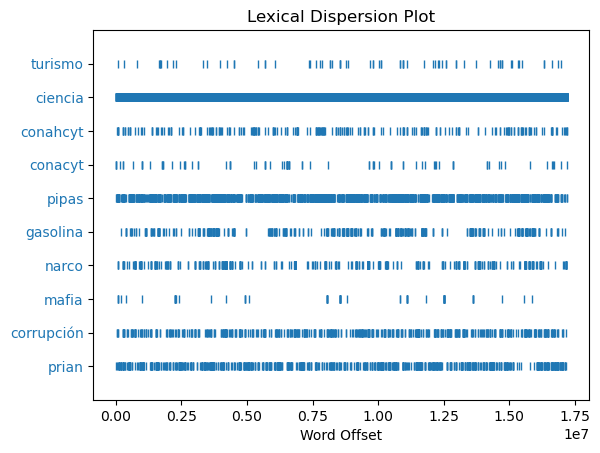

In [15]:
conferencias_ordenadas_texto.dispersion_plot(["prian","corrupción","mafia","narco","gasolina","pipas","conacyt","conahcyt","ciencia","turismo"])

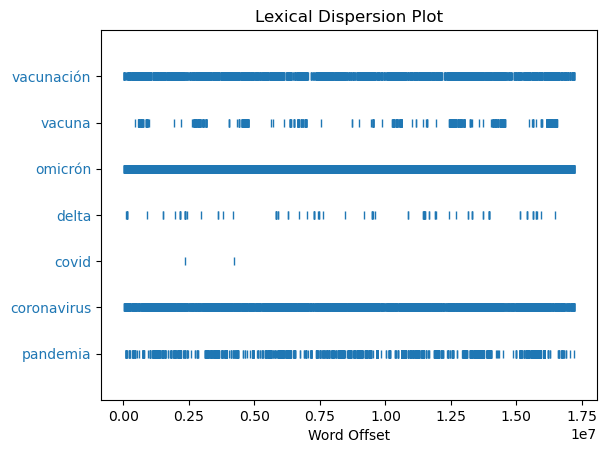

In [19]:
conferencias_ordenadas_texto.dispersion_plot(["pandemia","coronavirus","covid","delta","omicrón","vacuna","vacunación"])

En las gráficas anteriores no se distinguen bien algunas dispersiones debido a la cantidad de palabras, a continuación se muestra una grpafica por palabra:

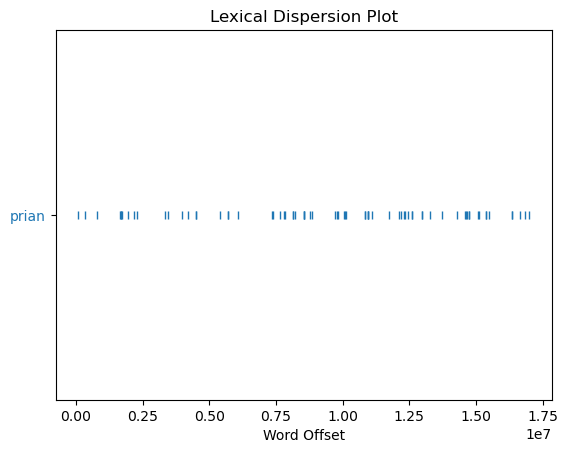

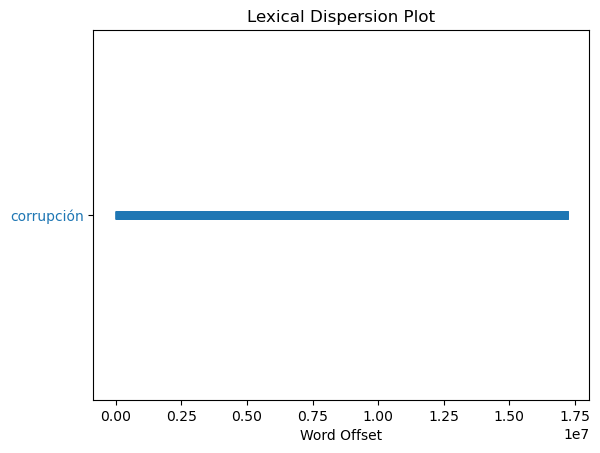

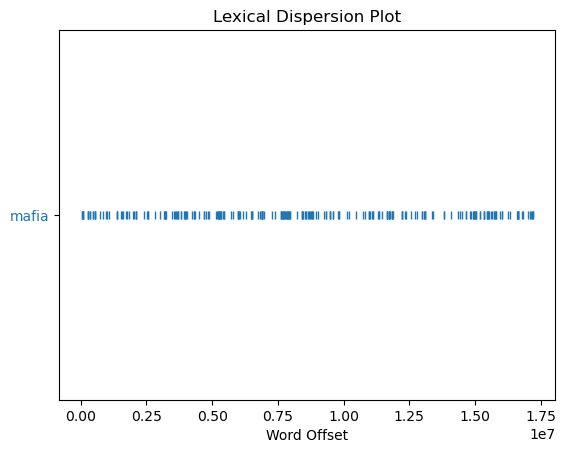

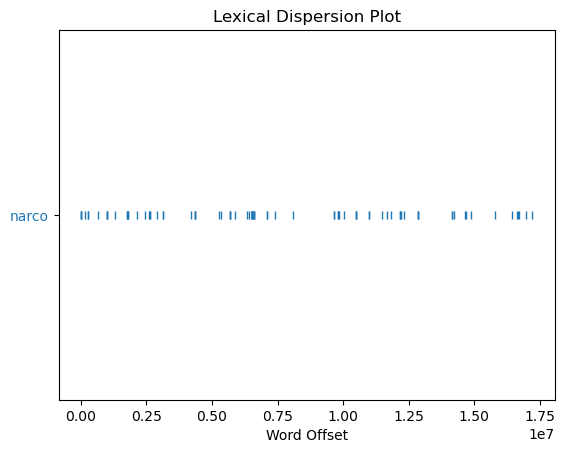

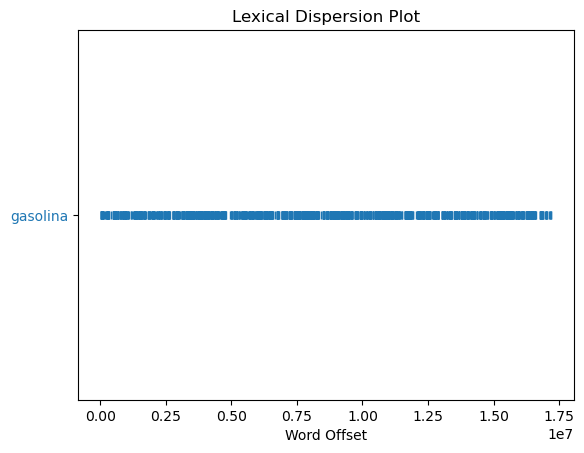

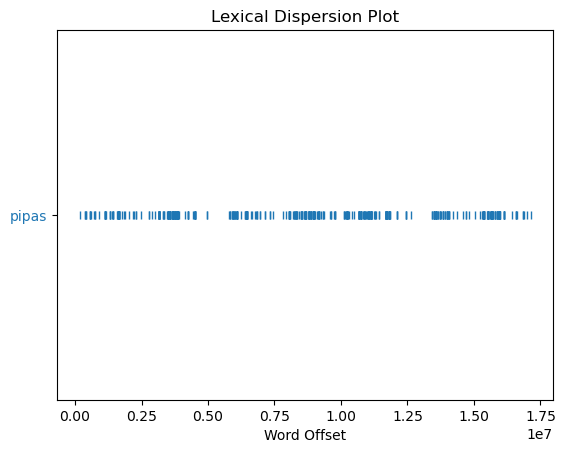

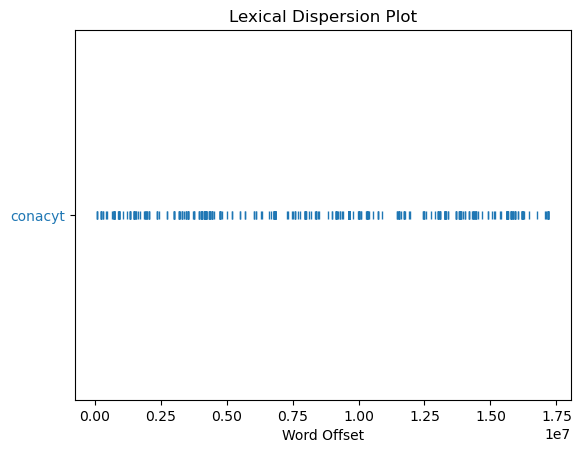

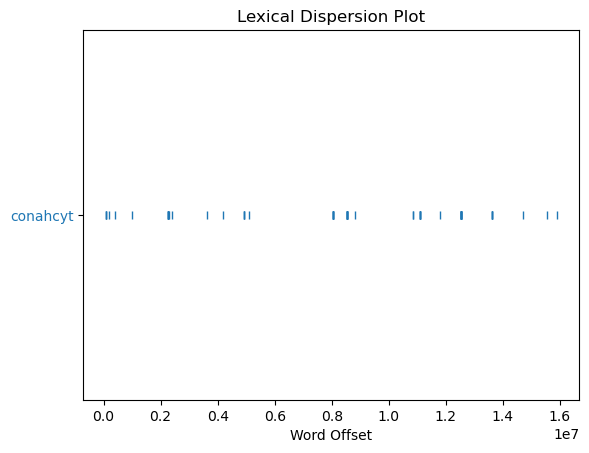

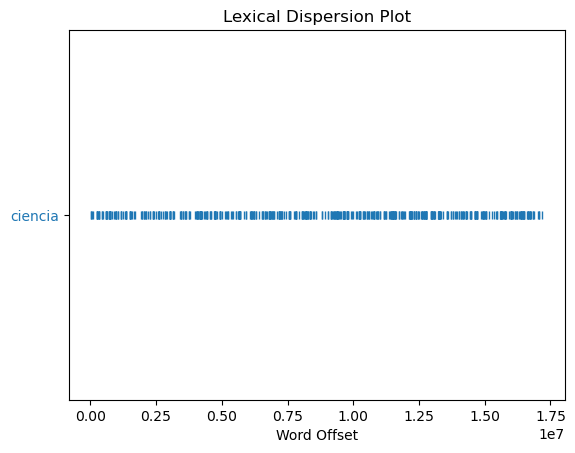

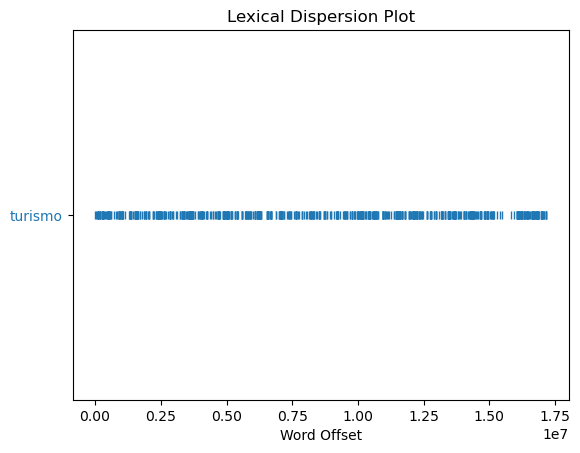

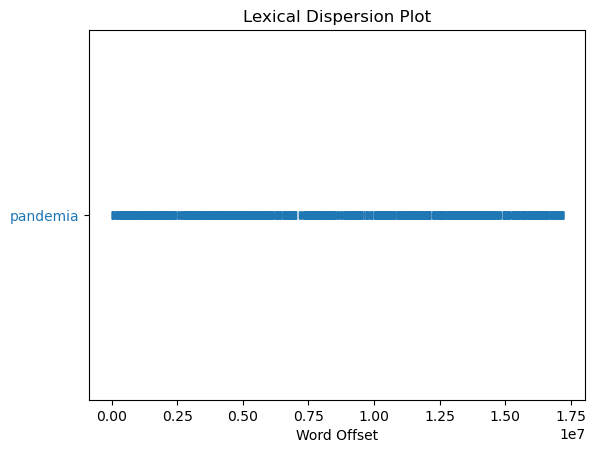

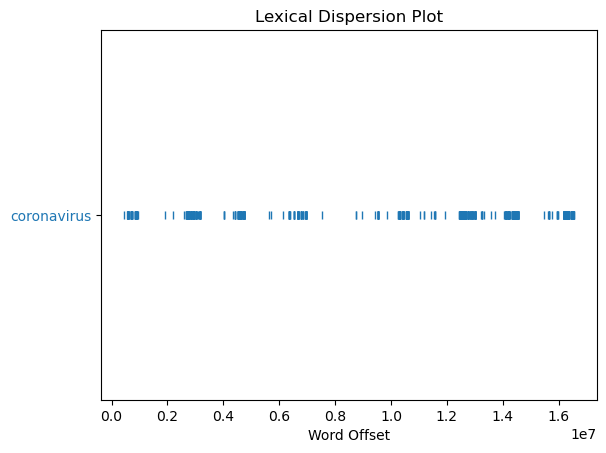

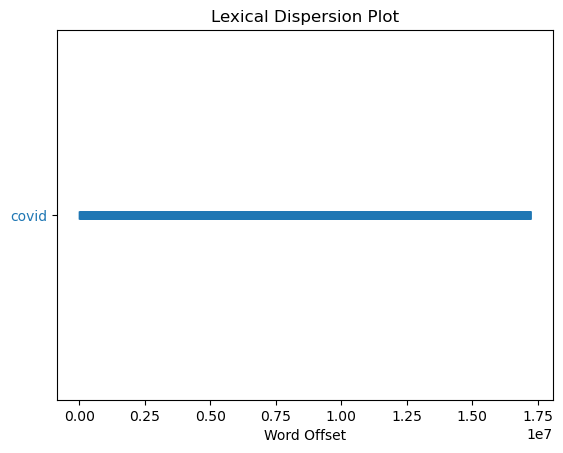

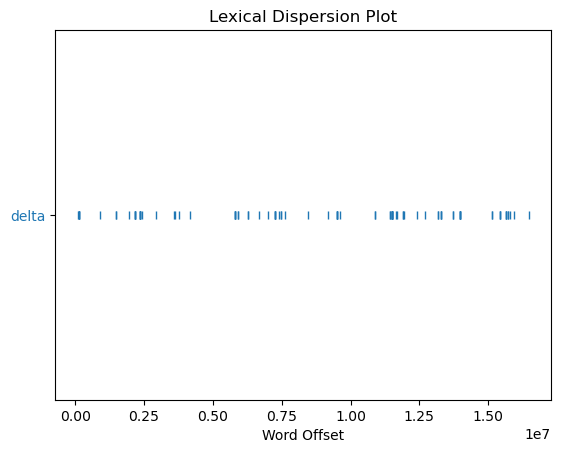

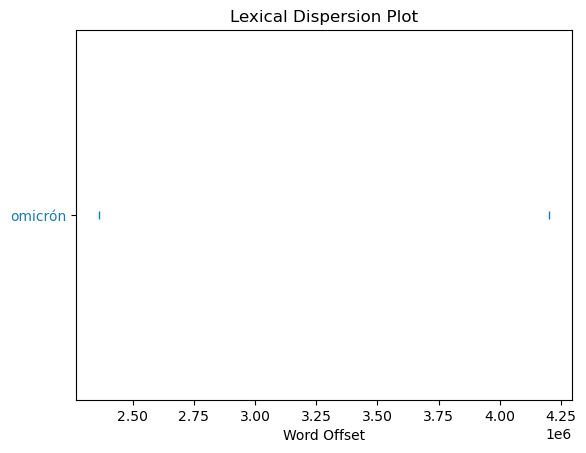

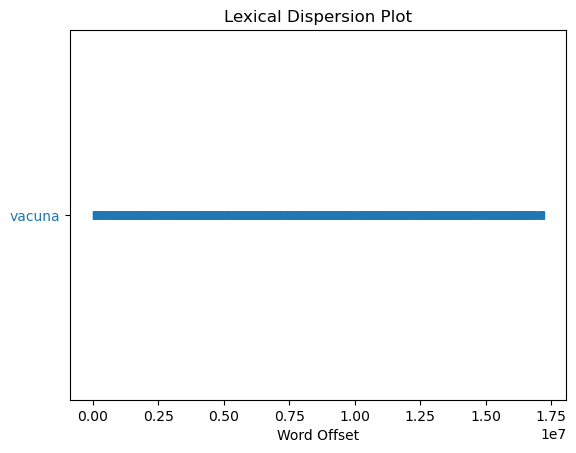

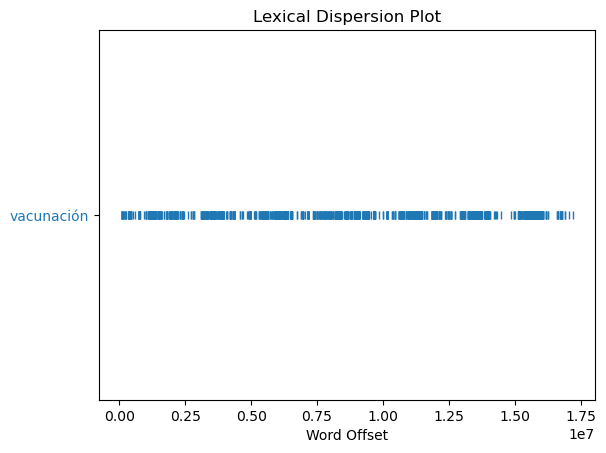

In [23]:
palabras_plot=["prian","corrupción","mafia","narco","gasolina","pipas","conacyt","conahcyt","ciencia","turismo","pandemia","coronavirus","covid","delta","omicrón","vacuna","vacunación"]
for palabra in palabras_plot:
    conferencias_ordenadas_texto.dispersion_plot([palabra])

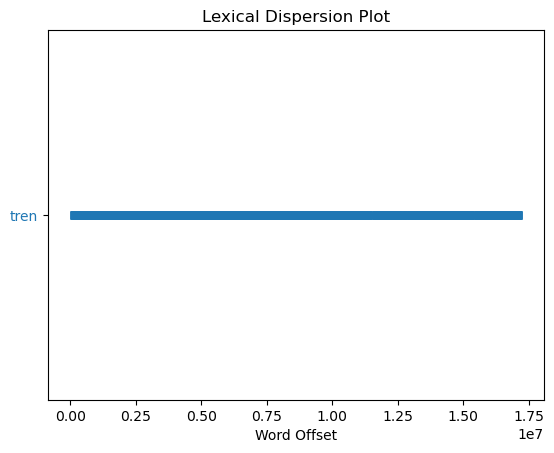

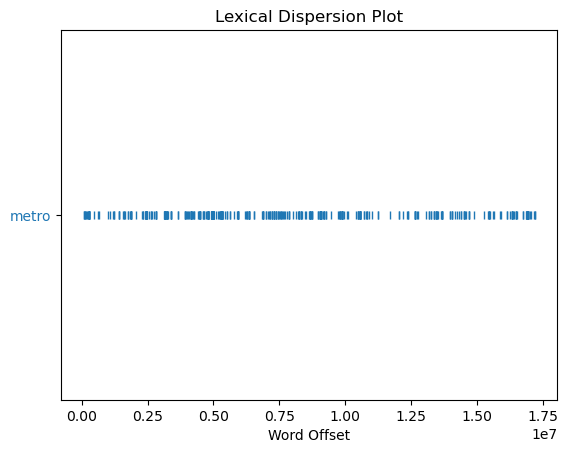

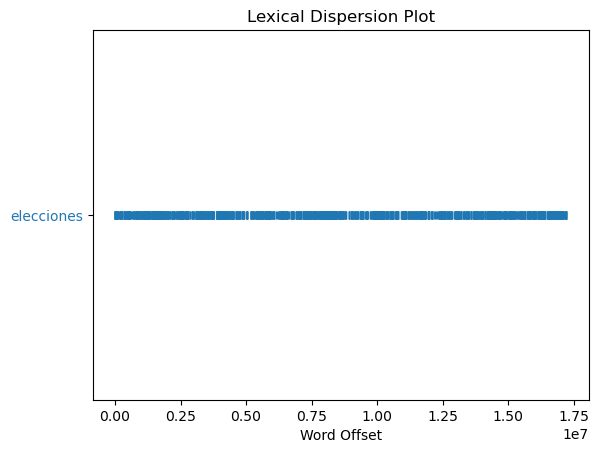

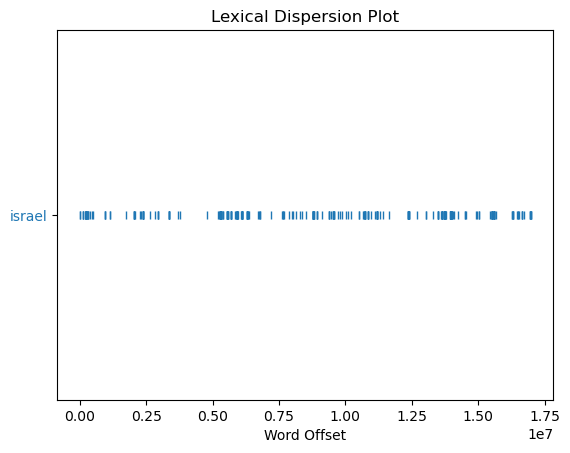

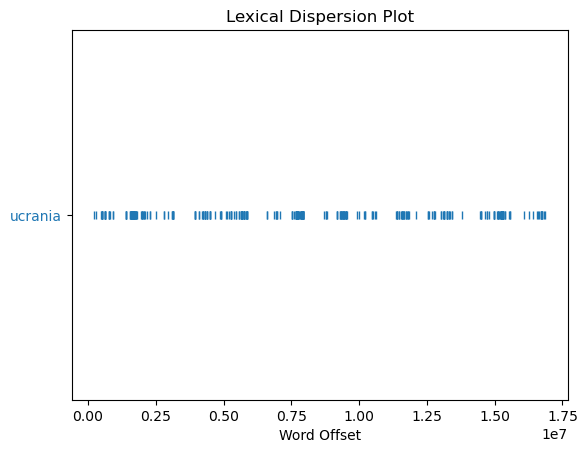

In [24]:
palabras=["tren","metro","elecciones","israel","ucrania"]
for palabra in palabras:
    conferencias_ordenadas_texto.dispersion_plot([palabra])

<font size=2.5 color='lightblue'>
4. Colocaciones

In [25]:
conferencias_ordenadas_texto.collocations(num=50)

lópez obrador; andrés manuel; manuel lópez; presidente andrés; estados
unidos; por ciento; versión estenográfica; buenos días; señor
presidente; todos los; prensa matutina; nada más; tren maya; adultos
mayores; por eso; guardia nacional; muchas gracias; desde luego; mil
millones; por ejemplo; redes sociales; quintana roo; sin embargo;
todas las; baja california; derechos humanos; muy importante; benito
juárez; creo que; sobre todo; sembrando vida; nuestro país; por qué;
muy bien; que que; ramírez cuevas; para que; 5093 4900; argument
supplied; documentosdocumentos gabinetegabinete; fotogalería
fotogalerías; invalid argument; reserved developed; threads spotify;
rights reserved; 01800 080 1127; spotify telegram; privacidad
copyright; telegram tiktok; boletines transcripciones


<font size=2.5 color='lightblue'>
5. Histograma

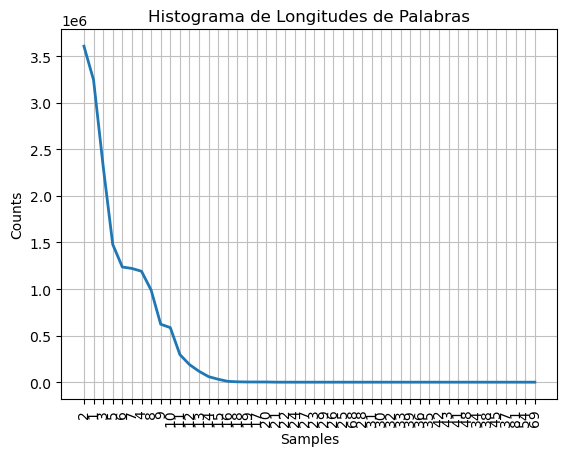

<Axes: title={'center': 'Histograma de Longitudes de Palabras'}, xlabel='Samples', ylabel='Counts'>

In [26]:
# Comprehension List para crear la lista "longitudes" que contiene la longitud de cada palabra en el texto.
longitudes = [len(palabra) for palabra in conferencias_ordenadas_texto]
histograma = nltk.FreqDist(longitudes) 
# Visualizamos
histograma.plot(title="Histograma de Longitudes de Palabras", cumulative=False)


<font size=2.5 color='lightblue'>
6. Comprehension Lists

In [36]:
# Obtener todas las palabras del texto que cumplen con los criterios
palabras_longitud8_frecuencia5 = [palabra for palabra, frecuencia in nltk.FreqDist(conferencias_ordenadas_texto).items() if len(palabra) > 8 and frecuencia > 5]

In [38]:
# Mostramos las últimas 50 palabras
for i in range(50):
    print(palabras_longitud8_frecuencia5[-i])

estenográfica
montebello
catalítico
convertidor
etlatongo
megasubasta
xalatlaco
petrirena
garaicochea
mexicanero
guardaparques
periscopio
colotepec
ifosfamida
ses-covid
nepomuceno
depositaría
sahuatenipa
ticketmaster
2014-2018
sedimentos
televisiva
arrepiente
florescano
cristalino
cocinando
desgastado
exmandatario
moralíceme
sombrilla
contralmirante
criticados
zigzaguear
juarenses
geomembrana
alimentadores
obrero-patronal
guarnición
promediar
telerehabilitación
veintitantos
divertirse
temapache
compartían
agrotóxicos
manservisi
mlambo-ngcuka
spotligth
avergonzarme
autódromo


<font size=2.5 color='lightblue'>
8. StopWord

In [44]:
#stopwords en español de nltk
stopwords_esp = set(stopwords.words('spanish'))
#cantidad de palabras sin eliminar stopwords
total_palabras_sin_stopwords = len([palabra for palabra in conferencias_ordenadas_texto if palabra not in stopwords_esp])
#cantidad de palabras  eliminando stopwords
total_palabras_con_stopwords = len(conferencias_ordenadas_texto)

print("Total de palabras sin stopwords:", total_palabras_sin_stopwords)
print("Total de palabras con stopwords:", total_palabras_con_stopwords)

Total de palabras sin stopwords: 9721847
Total de palabras con stopwords: 17214205


<font size=2.5 color='lightblue'>
9. 300 palabras más frecuentes

In [45]:
#Eliminamos las stopwords
texto_sin_stopwords = [palabra for palabra in conferencias_ordenadas_texto if palabra.lower() not in stopwords_esp]

frecuencia_palabras = nltk.FreqDist(texto_sin_stopwords) #frecuencia de cada palabra

palabras_comunes = frecuencia_palabras.most_common(300) #palabras mas frecuentes


In [46]:
#Mostramos las 300 palabras más comunes en el texto (sin stopwords
for palabra, frecuencia in palabras_comunes:
    print(palabra, "-", frecuencia)

, - 1366951
. - 577533
: - 124355
presidente - 95128
¿ - 67438
? - 67301
lópez - 50659
manuel - 49686
obrador - 49340
andrés - 48952
si - 48518
vamos - 46613
va - 46059
méxico - 45978
mil - 44177
entonces - 43432
; - 42182
aquí - 32619
gobierno - 31790
dos - 25459
ahora - 25367
nacional - 23381
pues - 22980
‘ - 22856
ver - 22629
’ - 21939
millones - 20907
- - 20435
pueblo - 20398
país - 20351
ahí - 20308
pesos - 19963
van - 19946
bueno - 19928
caso - 19472
cómo - 18770
así - 18518
gente - 18162
ser - 18083
hacer - 17393
… - 16925
días - 16766
salud - 16613
pregunta - 16497
ciento - 16228
año - 15926
señor - 15826
/ - 15744
usted - 15359
años - 15305
bien - 15131
tres - 15081
gracias - 14543
tener - 14045
importante - 13951
manera - 13865
mismo - 13753
decir - 13708
puede - 13632
prensa - 13293
tema - 13154
hace - 13126
parte - 13028
tiempo - 13024
información - 12700
programa - 12665
seguridad - 12625
hoy - 12554
día - 12528
personas - 12266
todas - 12198
poder - 12179
general - 12093


<font size=4.5 color='lightblue'>

$\textit{Ejercicio 3}$


1. Mencione dos librerías en Python además de NLTK para NLP. Ponga una desventaja y ventaja de cada una.

    - spaCy (Matt Honnibal, 2015)

    spaCy de Python es una librería open source para NLP. Existe una librería similar a spaCy de Python, que se denomina NLTK. La principal diferencia es que NLTK maneja un entorno más cómodo y es perfecta para principiantes, mientras que spaCy está más pensada para la productividad. 
    
        Funcionalidades para el PLN:
    tokenización, lematización, etiquetado POS, análisis de dependencias, reconocimiento de entidades nombradas (NER),segmentación de frases, coincidencia basada en reglas.
    
    Destaca por la velocidad y eficiencia al procesar el texto, (ideal grandes volúmenes de datos)
    
        Ventajas de usar Spacy:
    
    *Fácil de usar: API intuitiva y amplia documentación.
    
    *Comunidad activa: tiene una comunidad activa de usuarios y desarrolladores que contribuyen a su mejora.
    
    *Componentes que permiten el reconocimiento de entidades nombradas, etiquetado de partes de discurso, análisis de dependencia, segmentación de oraciones, clasificación de texto, lematización o análisis morfológico, entre otros.
    
        Desventajas de usar Spacy:
    *Precisión: La precisión de Spacy puede variar dependiendo del tipo de tarea y del idioma del texto.
    
    *Curva de aprendizaje: es fácil de usar, pero hay que dedicar tiempo a aprender sus funcionalidades.
    
        Fuentes:
    
    https://keepcoding.io/blog/como-funciona-spacy-de-python/
    
    https://spacy.io
    
    https://en.wikipedia.org/wiki/SpaCy

    * TextBlob (Steven Loria, 2010)
    
    Es una librería de Python para procesar datos textuales. Proporciona una API para tareas comunes de procesamiento del lenguaje natural, taes como el etiquetado de partes del discurso, la extracción de frases sustantivas, el análisis de sentimientos y más.
    
        Funcionalidades para el PNL:
     Extracción de frases sustantivas, etiquetado de parte del discursoc (es decir, asigna a cada palabra su categoría gramatical por ejemplo, sustantivo, verbo, adjetivo), análisis de los sentimientos, clasificación (Naive Bayes, árbol de decisión), tokenización (división de texto en palabras y oraciones), frecuencias de palabras y frases, analizando
    n-gramas, corrección ortográfica,a ñade nuevos modelos o idiomas a través de extensiones, integración de WordNet
    
        Ventajas de usar TextBlob:
    *La mayor ventaja es su facilidad de uso. Es ideal para principiantes, además es una biblioteca pequeña y rápida.
    También se integra con la biblioteca NLTK, lo que permite acceder a una gama más amplia de funcionalidades.
    
        Desventajas de usar TextBlob:
    *Puede ser limitado en términos de funcionalidades avanzadas en comparación con bibliotecas más completas como spaCy. Para aplicaciones que requieren un mayor control sobre el proceso de NLP o funcionalidades más avanzadas, TextBlob se queda atrás en comparación con spaCy o NLTK.
    *La precisión  puede ser menor que la de otras bibliotecas.
    
    *No es tan flexible como otras bibliotecas, lo que dificulta su adaptación a necesidades específicas.
    
        Fuentes:
    http://textblob.readthedocs.io/en/dev/

    https://notebook.community/vitojph/kschool-nlp/notebooks-py2/textblob

2. Menciona tres alternativas para text procesing en NLP que existan en otros lenguajes. Da un ventaja y otra desventaja


    * Stanford CoreNLP (Java):

    Es un conjunto de herramientas de procesamiento del lenguaje natural desarrollado en la Universidad de Stanford y escrito en Java.

        Ventaja: 

    Tal como las librerías antes mencionadas de python, incluye una amplia gama de herramientas como tokenización, lematización, análisis de dependencias, análisis de sentimientos y reconocimiento de entidades nombradas (NER). Además, cuenta con modelos pre-entrenados para varios idiomas.

        Desventaja: 

    Requiere configuración y dependencias adicionales, lo que puede ser complicado de implementar y mantener en comparación con las bibliotecas NLTK o spaCy mencionadas antes. También requiere de una gran cantidad de memoria.


    * Apache OpenNLP (Java):

    Ésta es una biblioteca de código abierto, basada en aprendizaje automático, para el procesamiento del lenguaje natural escrito en Java también. aAdmite las tareas de PNL más comunes, como tokenización, segmentación de oraciones, etiquetado de partes del discurso, extracción de entidades con nombre, fragmentación, análisis, detección de idioma y resolución de correferencia.

        Ventaja:

    Igual que todas las herramientas ya mencionadas, ofrece una variedad de herramientas para tareas de NLP. Pueden crearse modelos personalizados para tareas específicas o dominios de lenguaje.

        Desventaja: 

    Su desarrollo puede ser menos activo en comparación con otras bibliotecas más nuevas y de código abierto, lo que se traduce en menos actualizaciones.

    * SpaCy.js (JavaScript):

    Es una interfaz JavaScript que permite acceder a las funcionalidades para procesamiento del lenguaje natural de spaCy de python.

        Ventaja:

    Como es una versión de spaCy adaptada para JavaScript, permite realizar procesamiento de lenguaje natural en el navegador web o en entornos de JavaScript. Se puede hacer un fork desde Github: https://github.com/apache/opennlp

        Desventaja:

    No es tan completo como la versión de Python de spaCy, y carece de algunas funcionalidades avanzadas, además de que el renimiento no es tan bueno en comparación con las bibliotecas nativas de Python .


        Fuentes

    https://spacy.io/universe/project/spacy-js

    https://opennlp.apache.org
    
    https://stanfordnlp.github.io/CoreNLP/

        